In [16]:
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib import rcParams
rcParams['figure.figsize'] = (20.0, 10.0)
plt.style.use('ggplot')
import numpy as np

import scipy.stats

In [3]:
CAREER_LENGTH = 5

In [4]:
credible_authors = pd.read_csv('derived-data/authors-scientific-atleast-'+ str(CAREER_LENGTH) + '-year-extended.csv', encoding='utf-8')

In [5]:
credible_authors = credible_authors.set_index('author')

In [6]:
credible_authors.head()

,start_year,end_year,num_pub,career_length,early_career_qual,early_career_recognition,succ_after_15y,early_career_prod,gender
author,,,,,,,,,
a min tjoa,1979,2017,191,39,0.0,0.0,2.0,1,none
a-long jin,2011,2016,9,6,0.0,0.0,19.0,1,none
a-nasser ansari,2003,2009,10,7,70.0,27.0,89.0,4,m
a-xing zhu,1998,2017,22,20,0.0,0.0,38.0,1,none
a. a. (louis) beex,1980,2016,31,37,0.0,0.0,4.0,2,m


In [7]:
years = credible_authors.start_year.unique()

In [8]:
for year in years:
    temp = credible_authors[credible_authors.start_year == year]
    medi = temp.succ_after_15y.median()
    credible_authors.loc[credible_authors.start_year == year, 'successful'] = credible_authors.loc[
        credible_authors.start_year == year, 'succ_after_15y'].apply(lambda x: 1 if x >= medi else 0)

In [9]:
test_start_year = 1998

In [10]:
credible_test = credible_authors[credible_authors.start_year == test_start_year]

In [11]:
credible_test.head()

,start_year,end_year,num_pub,career_length,early_career_qual,early_career_recognition,succ_after_15y,early_career_prod,gender,successful
author,,,,,,,,,,
a-xing zhu,1998,2017,22,20,0.0,0.0,38.0,1,none,1.0
a. aguado,1998,2002,2,5,7.0,3.0,11.0,1,m,0.0
a. amin,1998,2009,4,12,8.0,2.0,8.0,3,none,0.0
a. c. verschueren,1998,2002,2,5,0.0,0.0,1.0,1,m,0.0
a. cruz,1998,2010,4,13,2.0,1.0,6.0,2,m,0.0


In [12]:
colors = credible_test.successful.apply(lambda x: 'black' if x==1 else 'white')

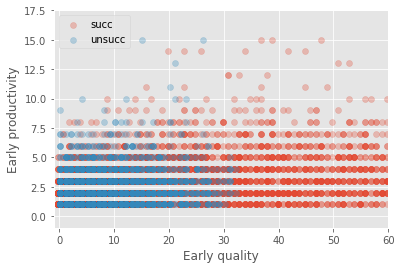

In [13]:
plt.scatter(credible_test[credible_test.successful == 1].early_career_qual - 0.2, 
            credible_test[credible_test.successful == 1].early_career_prod, label='succ', alpha=0.3) #, color=colors)
plt.scatter(credible_test[credible_test.successful == 0].early_career_qual + 0.2, 
            credible_test[credible_test.successful == 0].early_career_prod, label='unsucc', alpha=0.3) #, color=colors)
plt.xlabel('Early quality')
plt.ylabel('Early productivity')
plt.ylim((-1,17.5))
plt.xlim((-1,60))
plt.legend()
plt.show()

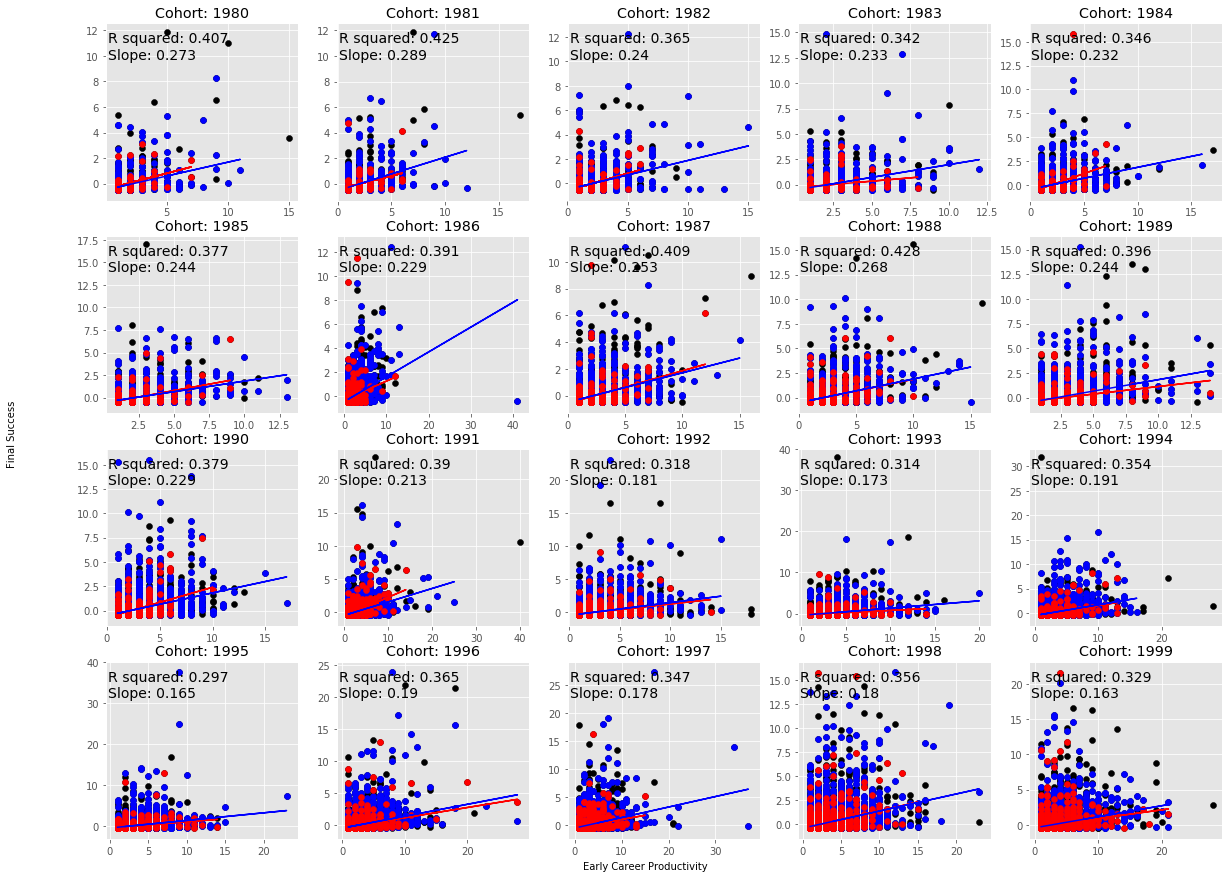

   year num_obs  group     slope  intercept   r_value       p_value   std_err
0  1980    1009    all  0.273289  -0.556058  0.406992  1.546752e-41  0.019328
1  1980     608    men  0.217495  -0.491513  0.374869  1.010988e-21  0.021850
2  1980      69  women  0.250752  -0.447126  0.436390  1.779177e-04  0.063162
3  1981    1103    all  0.289147  -0.592974  0.425196  1.186468e-49  0.018550
4  1981     641    men  0.261194  -0.546550  0.396942  1.276207e-25  0.023892


In [17]:
from matplotlib.lines import Line2D

zscore = True
numcols = 5
start_range = 1980
end_range = 2000
cells = end_range - start_range
numrows = int(cells/numcols)

var = "prod" # can also be qual

results = pd.DataFrame(columns=["year", "num_obs", "group", "slope", "intercept", "r_value", "p_value", "std_err"])
fig, ax = plt.subplots(nrows=numrows, ncols=numcols, sharex=False, sharey=False, figsize=(20,15))


custom_lines = [Line2D([0], [0], color='red', lw=4),
                Line2D([0], [0], color='blue', lw=4),
                Line2D([0], [0], color='black', lw=4)]
for year in range(start_range, end_range):
    data = credible_authors[credible_authors.start_year == year]
    x = data['early_career_prod']
    
    
    if(zscore):
        y = (data['succ_after_15y']-np.mean(data['succ_after_15y']))/np.std(data['succ_after_15y'])
    else:
        y = data['succ_after_15y']/np.sum(data['succ_after_15y'])
   
    x_f = data[data.gender == 'f']['early_career_prod']
    if(zscore):
        y_f = (data[data.gender == 'f']['succ_after_15y']-np.mean(data['succ_after_15y']))/np.std(data['succ_after_15y'])
    else:
        y_f = data[data.gender == 'f']['succ_after_15y']/np.sum(data['succ_after_15y'])
    
    x_m = data[data.gender == 'm']['early_career_prod']
    if(zscore):
        y_m = (data[data.gender == 'm']['succ_after_15y']-np.mean(data['succ_after_15y']))/np.std(data['succ_after_15y'])
    else:
        y_m = data[data.gender == 'm']['succ_after_15y']/np.sum(data['succ_after_15y'])
    

    axes = ax[(year-start_range)//numcols,year%start_range%numcols]
    axes.scatter(x, y, color="black")
    axes.scatter(x_m, y_m, color="blue")
    axes.scatter(x_f, y_f, color="red")
    fit = np.polyfit(x, y, deg=1)
    fit_f = np.polyfit(x_f, y_f, deg=1)
    fit_m = np.polyfit(x_m, y_m, deg=1)
    #axes.plot(x, fit[0] * x + fit[1], color='black')
    axes.plot(x_f, fit_f[0] * x_f + fit_f[1], color='red')
    axes.plot(x_m, fit_m[0] * x_m + fit_m[1], color='blue')
    axes.set_title("Cohort: " + str(year))
    # plt.xlim(0, 50)
    # plt.ylim(0,200)
    slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(x, y)
    results = results.append({"year":year, "num_obs":len(x), "group":"all", "slope":slope, "intercept":intercept, 
                              "r_value":r_value, "p_value":p_value, "std_err":std_err}, ignore_index=True)
    
    m_slope, m_intercept, m_r_value, m_p_value, m_std_err = scipy.stats.linregress(x_m, y_m)
    results = results.append({"year":year, "num_obs":len(x_m), "group":"men", "slope":m_slope, "intercept":m_intercept, 
                              "r_value":m_r_value, "p_value":m_p_value, "std_err":m_std_err}, ignore_index=True)
    f_slope, f_intercept, f_r_value, f_p_value, f_std_err = scipy.stats.linregress(x_f, y_f)
    results = results.append({"year":year, "num_obs":len(x_f), "group":"women", "slope":f_slope, "intercept":f_intercept, 
                              "r_value":f_r_value, "p_value":f_p_value, "std_err":f_std_err}, ignore_index=True)
    
    #print(slope, intercept)
    #axes.add_artist(axes.legend("R squared: " + str(r_value), loc=2))
    axes.annotate("R squared: " + str(np.round(r_value, decimals=3))+"\nSlope: "+str(np.round(slope, decimals=3)), xy=(0.01,0.8), xycoords='axes fraction', fontsize=14)
    #axes.legend(custom_lines, ['Female', 'Male', 'All'], loc=1)
fig.text(0.5, 0.1, 'Early Career Productivity', ha='center', va='center')
fig.text(0.06, 0.5, 'Final Success', ha='center', va='center', rotation='vertical')
plt.show()
if(zscore):
    fig.savefig("fig/earlycareer_"+str(var)+"_final_success_zscore.png", edgecolor='none', bbox_inches='tight')
else:
    fig.savefig("fig/earlycareer_"+str(var)+"_final_success.png", edgecolor='none', bbox_inches='tight')

print(results.head())
if(zscore):
    results.to_csv("fig/earlycareer_"+str(var)+"_final_success_zscore.csv")
else:
    results.to_csv("fig/earlycareer_"+str(var)+"_final_success.csv")

In [18]:
results[results.year==1985]

,year,num_obs,group,slope,intercept,r_value,p_value,std_err
15,1985,2134,all,0.244220,-0.528608,0.377444,3.211072e-73,0.012977
16,1985,1275,men,0.235367,-0.520401,0.395374,5.787156e-49,0.015325
17,1985,173,women,0.285464,-0.647214,0.478725,2.699133e-11,0.040035


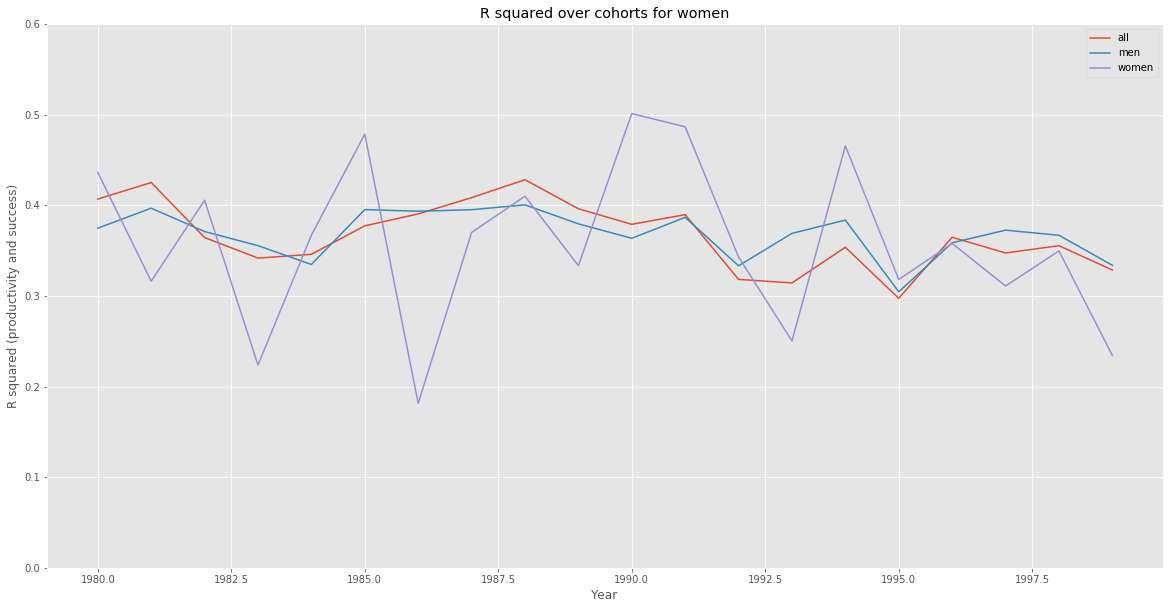

In [19]:
for group in ['all', 'men', 'women']:
    temp = results[results.group == group]
    plt.plot(temp['year'], temp['r_value'], label=group)
plt.xlabel("Year")
plt.ylabel("R squared (productivity and success)")
plt.title("R squared over cohorts for " + group)
plt.ylim((0,0.6))
plt.legend()
plt.show()

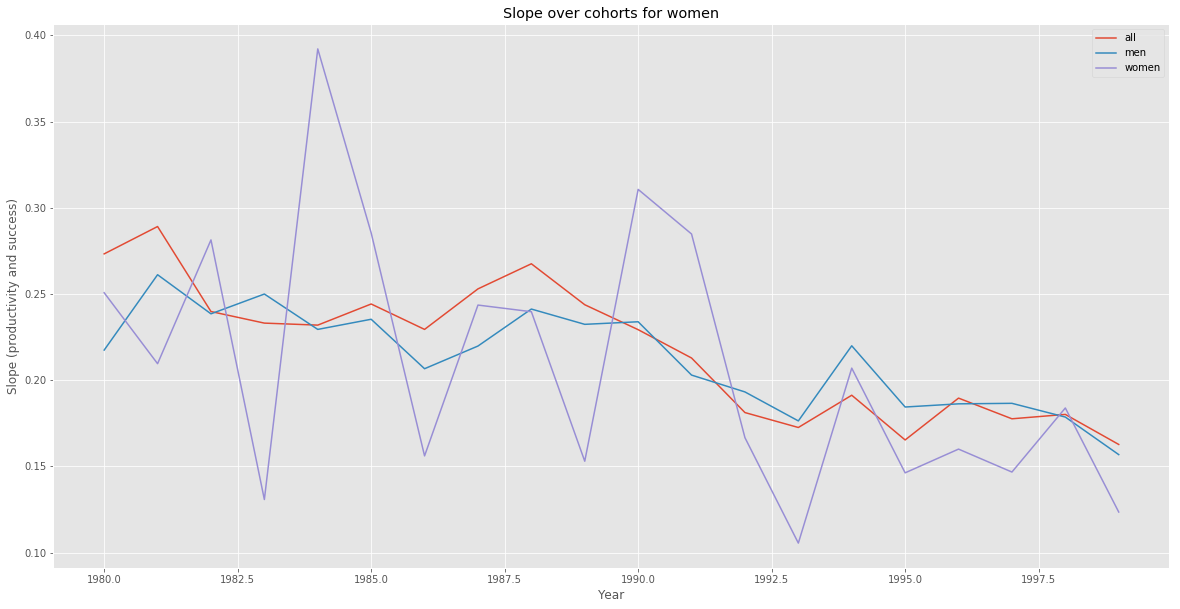

In [20]:
for group in ['all', 'men', 'women']:
    temp = results[results.group == group]
    plt.plot(temp['year'], temp['slope'], label=group)
plt.xlabel("Year")
plt.ylabel("Slope (productivity and success)")
plt.title("Slope over cohorts for " + group)
plt.legend()
plt.show()

## Correlation testing

In [15]:
np.corrcoef(credible_test.early_career_qual, credible_test.succ_after_15y)

array([[1.        , 0.65301303],
       [0.65301303, 1.        ]])

In [16]:
from scipy.stats.stats import pearsonr   
pearsonr(credible_test.early_career_qual, credible_test.succ_after_15y)

(0.6530130276377881, 0.0)

In [17]:
np.corrcoef(credible_authors.early_career_qual, credible_authors.succ_after_15y)

array([[1.       , 0.6600555],
       [0.6600555, 1.       ]])

In [18]:
from scipy.stats.stats import pearsonr   
pearsonr(credible_authors.early_career_qual, credible_authors.succ_after_15y)

(0.6600555026546597, 0.0)

## Citations over the years - all work

In [23]:
citations_year_auth = pd.read_csv('./derived-data/authors-perYear-citations-atleast-5-year.csv')

In [24]:
all_cited_authors = citations_year_auth.author.unique()

In [25]:
citations_year_auth = citations_year_auth.sort_values(by=['author', 'year_cit'])

In [26]:
# for cited_author in all_cited_authors:
#     citations_year_auth.loc[citations_year_auth.author == cited_author, 'cum_cit_count'] = citations_year_auth.loc[
#         citations_year_auth.author == cited_author,'cit_count'].cumsum()

In [27]:
citations_year_auth['cum_cit_count'] = citations_year_auth.groupby('author')['cit_count'].transform(pd.Series.cumsum)

In [28]:
citations_year_auth.head()

,author,year_cit,cit_count,cum_cit_count
0,'maseka lesaoana,2002,1,1
1,'maseka lesaoana,2003,1,2
2,'maseka lesaoana,2004,1,3
3,'maseka lesaoana,2005,2,5
4,'maseka lesaoana,2006,4,9


In [29]:
final_citation_count = credible_authors['final_citation_count']

In [30]:
final_citation_count.head()

author
'maseka lesaoana     25.0
a aart blokhuis       0.0
a min tjoa          799.0
a-imam al-sammak      0.0
a-long jin           19.0
Name: final_citation_count, dtype: float64

In [31]:
citations_year_auth['cum_cit_percent'] = citations_year_auth.apply(
    lambda row: row.cum_cit_count*100.0/final_citation_count[row.author], axis=1)

In [32]:
citations_year_auth['cit_percent'] = citations_year_auth.apply(
    lambda row: row.cit_count*100.0/final_citation_count[row.author], axis=1)

In [33]:
# credible_authors = credible_authors.set_index('author')
credible_authors['citation_percentage_list'] = citations_year_auth.groupby('author')['cit_percent'].apply(list)
credible_authors['cum_citation_percentage_list'] = citations_year_auth.groupby('author')['cum_cit_percent'].apply(list)

In [34]:
credible_authors['years_cited_list'] = citations_year_auth.groupby('author')['year_cit'].apply(list)

In [35]:
credible_authors.head()

,start_year,end_year,num_pub,career_length,early_career_qual,early_career_prod,early_career_pubs,early_career_rec,gender,final_citation_count,successful,citation_percentage_list,cum_citation_percentage_list,years_cited_list
author,,,,,,,,,,,,,,
'maseka lesaoana,2001,2015,2,15,5.0,1,['4ff8ca7b-16b7-4bc8-b235-1eeac9b2aefa'],0,none,25.0,0.0,"[4.0, 4.0, 4.0, 8.0, 16.0, 4.0, 12.0, 4.0, 4.0...","[4.0, 8.0, 12.0, 20.0, 36.0, 40.0, 52.0, 56.0,...","[2002, 2003, 2004, 2005, 2006, 2007, 2008, 200..."
a aart blokhuis,1992,2005,2,14,0.0,1,['f80ada7b-a8ef-43b0-b1c7-5c35f8cd0ea8'],0,none,0.0,0.0,NaN,NaN,NaN
a min tjoa,1979,2017,191,39,0.0,1,['608eb4db-5623-4467-aba6-b7762abefe20'],0,none,799.0,1.0,"[0.2503128911138924, 0.1251564455569462, 0.500...","[0.2503128911138924, 0.37546933667083854, 0.87...","[1993, 1994, 1995, 1996, 1997, 1998, 1999, 200..."
a-imam al-sammak,1992,2006,3,15,0.0,1,['14528920-bfbd-457c-ace2-b4422ea6aafd'],0,m,0.0,0.0,NaN,NaN,NaN
a-long jin,2011,2016,9,6,0.0,1,['86a055b7-36a9-4b03-b9d4-71725e5d5b0d'],0,none,19.0,1.0,"[15.789473684210526, 57.89473684210526, 26.315...","[15.789473684210526, 73.6842105263158, 100.0]","[2015, 2016, 2017]"


In [37]:
test_start_year = 2000

In [38]:
credible_cited_authors = credible_authors.dropna(subset=['years_cited_list'])

In [39]:
credible_cited_authors_test = credible_cited_authors[credible_cited_authors.start_year == test_start_year]

In [40]:
# credible_cited_authors_test = credible_cited_authors_test[credible_cited_authors_test.successful == 1]

In [41]:
credible_cited_authors_test['relative_succ'] = credible_cited_authors_test.final_citation_count**2 / credible_cited_authors_test.final_citation_count.max()**2

/home/danielkostic/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [42]:
credible_cited_authors_test[credible_cited_authors_test.relative_succ > 0.1]

,start_year,end_year,num_pub,career_length,early_career_qual,early_career_prod,early_career_pubs,early_career_rec,gender,final_citation_count,successful,citation_percentage_list,cum_citation_percentage_list,years_cited_list,relative_succ
author,,,,,,,,,,,,,,,
adrian perrig,2000,2017,204,18,630.0,15,"['afe51ea9-5036-4de7-868e-786da50f6c3e', '745f...",0,m,14698.0,1.0,"[0.04082188052796299, 0.24493128316777793, 0.5...","[0.04082188052796299, 0.28575316369574094, 0.7...","[2000, 2001, 2002, 2003, 2004, 2005, 2006, 200...",1.000000
ajith abraham,2000,2017,665,18,60.0,19,"['1804739a-79b0-4cfa-bcfc-2a7e3ce5aa86', '4fe6...",0,m,6214.0,1.0,"[0.0965561635017702, 0.1287415513356936, 0.418...","[0.0965561635017702, 0.2252977148374638, 0.643...","[2001, 2002, 2003, 2004, 2005, 2006, 2007, 200...",0.178742
alexander c. berg,2000,2017,63,18,22.0,2,"['3d54de0c-f322-4481-9241-3c12c59e2507', '6ad0...",0,m,5753.0,1.0,"[0.08691117677733357, 0.08691117677733357, 0.0...","[0.08691117677733357, 0.17382235355466713, 0.2...","[2001, 2002, 2003, 2004, 2005, 2006, 2007, 200...",0.153205
alon y. halevy,2000,2017,132,18,340.0,14,"['69227924-49dd-4722-a889-08e6aa976a9c', 'dc7c...",0,m,7698.0,1.0,"[0.1558846453624318, 0.792413613925695, 2.0914...","[0.1558846453624318, 0.9482982592881268, 3.039...","[2001, 2002, 2003, 2004, 2005, 2006, 2007, 200...",0.274309
amrit pratap,2000,2005,5,6,129.0,3,"['8fb3b758-1d29-4ee0-b30c-df5493879e10', '4ad1...",0,m,6802.0,1.0,"[0.029403116730373418, 0.19112025874742722, 0....","[0.029403116730373418, 0.22052337547780065, 0....","[2001, 2002, 2003, 2004, 2005, 2006, 2007, 200...",0.214169
bastian leibe,2000,2017,116,18,40.0,6,"['00b047f2-37ea-409c-a5b1-a203bb8fa8c5', '8c09...",0,m,5061.0,1.0,"[0.03951788184153329, 0.17783046828689983, 0.1...","[0.03951788184153329, 0.21734835012843312, 0.3...","[2000, 2001, 2002, 2003, 2004, 2005, 2006, 200...",0.118565
bhaskar krishnamachari,2000,2017,214,18,66.0,7,"['eca6d65d-fec6-4b1b-80ab-77018f3375fa', '19f7...",0,m,6596.0,1.0,"[0.015160703456640388, 0.469981807155852, 1.24...","[0.015160703456640388, 0.4851425106124924, 1.7...","[2002, 2003, 2004, 2005, 2006, 2007, 2008, 200...",0.201393
chadi assi,2000,2017,191,18,329.0,7,"['8cc9ea80-563f-4e62-bda9-8ff6d71cf6ae', '9b9b...",0,m,6519.0,1.0,"[0.015339776039269826, 0.19941708851050774, 0....","[0.015339776039269826, 0.21475686454977758, 1....","[2000, 2001, 2002, 2003, 2004, 2005, 2006, 200...",0.196719
chih-chung chang,2000,2011,3,12,18.0,2,"['33184e74-4574-4856-a969-e497fdc2fec8', '4108...",0,none,10218.0,1.0,"[0.009786651008025053, 0.048933255040125266, 0...","[0.009786651008025053, 0.058719906048150326, 0...","[2001, 2002, 2003, 2004, 2005, 2006, 2007, 200...",0.483298


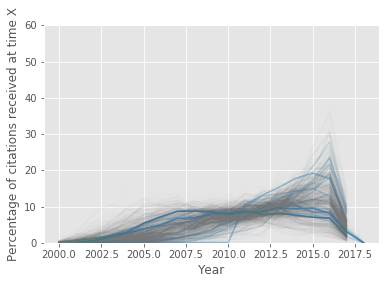

In [43]:
for author in credible_cited_authors_test.itertuples():
    if author.relative_succ <= 0.1:
        line_color = 'C3'
        plt.plot(author.years_cited_list, author.citation_percentage_list, line_color, alpha=author.relative_succ)
    if author.relative_succ > 0.2:
        line_color = 'C1'
        plt.plot(author.years_cited_list, author.citation_percentage_list, line_color, alpha=author.relative_succ)
plt.xlabel('Year')
plt.ylabel('Percentage of citations received at time X')
plt.ylim((0, 60))
plt.show()

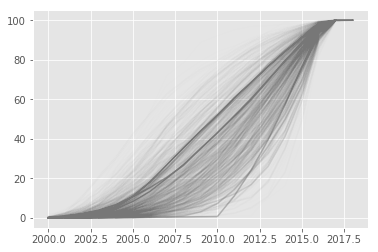

In [44]:
for author in credible_cited_authors_test.itertuples():
    plt.plot(author.years_cited_list, author.cum_citation_percentage_list, 'C3', alpha=author.relative_succ)
plt.show()